In [1]:
import pandas as pd

In [2]:
SMDR = pd.read_csv("SMDR.JK.csv")
SMDR

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-04,394.0,396.0,387.0,387.0,353.709106,10430500
1,2023-01-05,387.0,387.0,361.0,362.0,330.859711,29352500
2,2023-01-06,362.0,369.0,350.0,368.0,336.343567,14083500
3,2023-01-09,370.0,385.0,368.0,378.0,345.483337,17583000
4,2023-01-10,378.0,381.0,372.0,375.0,342.741394,6444000
...,...,...,...,...,...,...,...
235,2023-12-28,340.0,344.0,330.0,330.0,330.000000,36518400
236,2023-12-29,330.0,332.0,318.0,320.0,320.000000,25368400
237,2024-01-02,322.0,350.0,320.0,340.0,340.000000,86284800
238,2024-01-03,340.0,346.0,336.0,338.0,338.000000,21780600


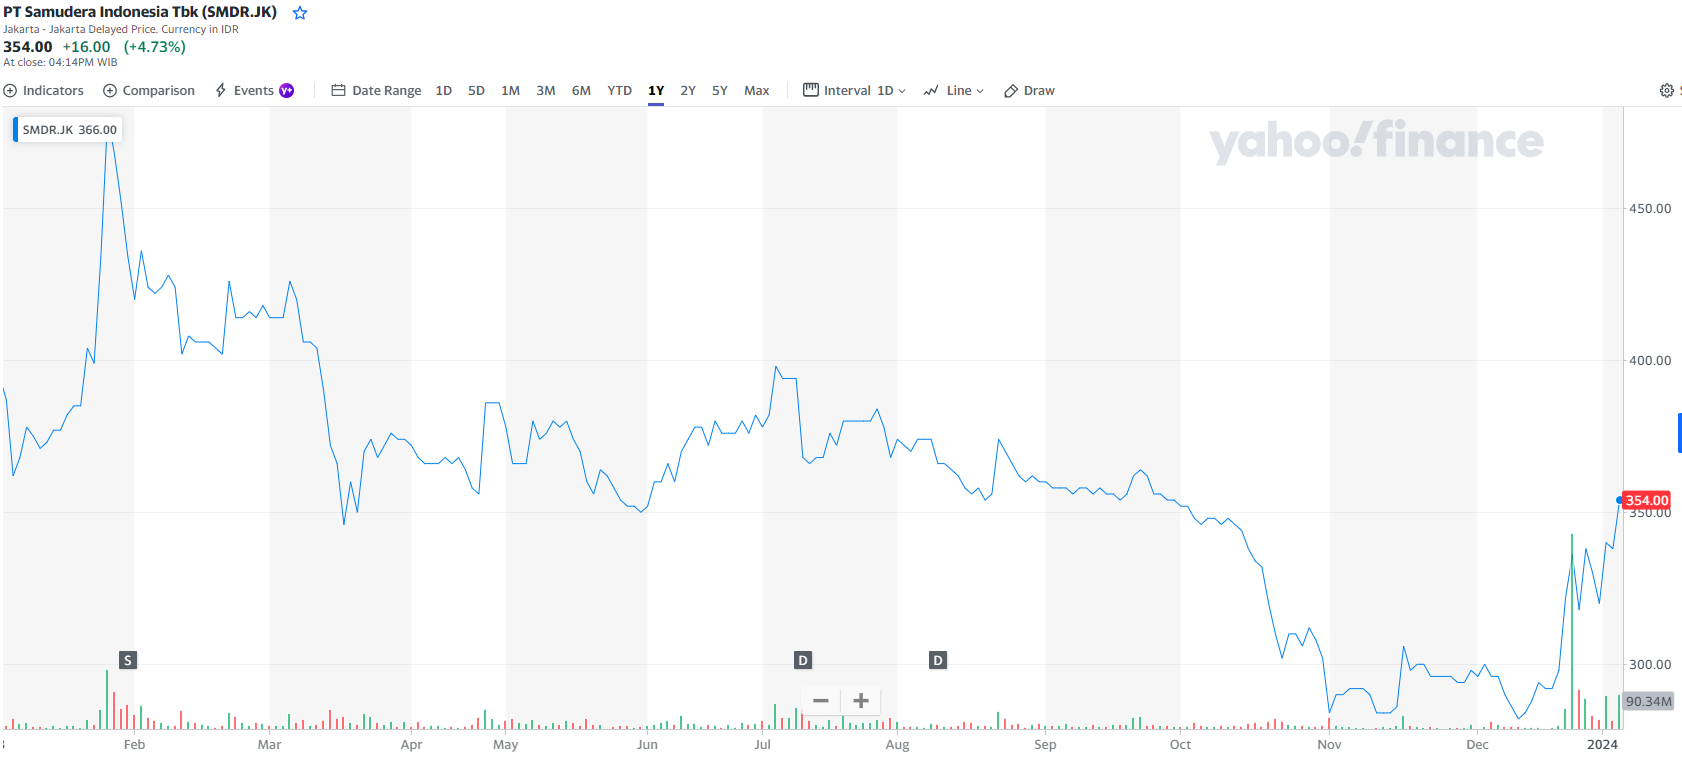

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_daily_returns(stock_prices):
    return np.diff(stock_prices) / stock_prices[:-1]

def calculate_statistics(data):
    mean = np.mean(data)
    std = np.std(data)
    return mean, std

# Function to calculate daily returns
def calculate_daily_returns(stock_prices):
    return np.diff(stock_prices) / stock_prices[:-1]

# Function to calculate mean and standard deviation
def calculate_statistics(data):
    mean = np.mean(data)
    std = np.std(data)
    return mean, std

# Function for stock price random walk
def stock_price_random_walk(num_days, initial_price, mean, std):
    daily_returns = np.random.normal(mean, std, num_days - 1)
    prices = [initial_price]

    for i in range(num_days - 1):
        prices.append(prices[-1] * (1 + daily_returns[i]))

    return np.array(prices)

# Function for random walk with probabilities
def random_walk_with_probabilities(initial_price, num_days, probabilities):
    prices = [initial_price]

    for i in range(num_days - 1):
        movement = np.random.choice([-1, 0, 1], p=probabilities)
        prices.append(prices[-1] + movement)

    return np.array(prices)

# Function for realistic random walk with probabilities (using cumulative sum)
def realistic_random_walk_with_probabilities(initial_price, num_days, probabilities):
    movements = np.random.choice([-1, 0, 1], size=num_days - 1, p=probabilities)
    prices = initial_price + np.cumsum(movements)
    return prices


In [4]:
SMDR

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-04,394.0,396.0,387.0,387.0,353.709106,10430500
1,2023-01-05,387.0,387.0,361.0,362.0,330.859711,29352500
2,2023-01-06,362.0,369.0,350.0,368.0,336.343567,14083500
3,2023-01-09,370.0,385.0,368.0,378.0,345.483337,17583000
4,2023-01-10,378.0,381.0,372.0,375.0,342.741394,6444000
...,...,...,...,...,...,...,...
235,2023-12-28,340.0,344.0,330.0,330.0,330.000000,36518400
236,2023-12-29,330.0,332.0,318.0,320.0,320.000000,25368400
237,2024-01-02,322.0,350.0,320.0,340.0,340.000000,86284800
238,2024-01-03,340.0,346.0,336.0,338.0,338.000000,21780600


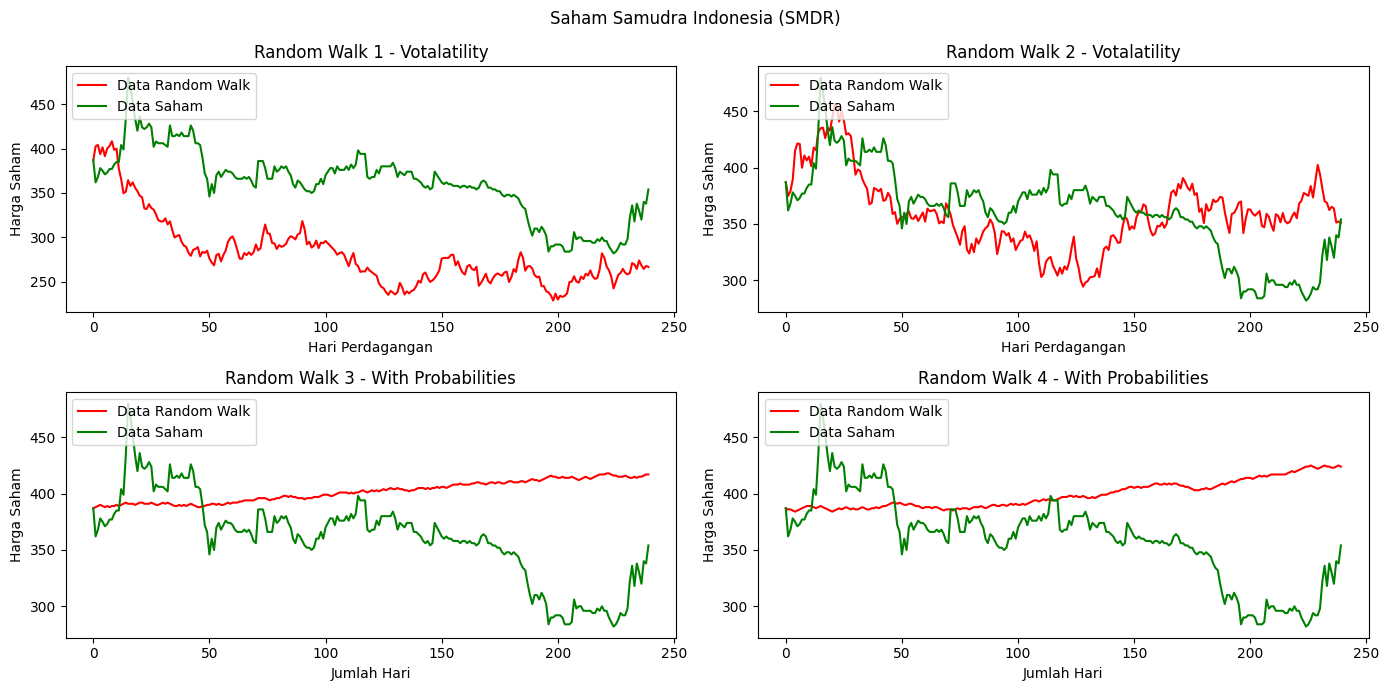

In [52]:
# Menghitung perubahan harian
numpy_array = SMDR['Close'].to_numpy()
daily_returns = calculate_daily_returns(numpy_array)

# Menghitung mean dan standard deviation dari perubahan harian
mean, std = calculate_statistics(daily_returns)
# Parameter untuk simulasi random walk saham
num_days = len(SMDR)  # Jumlah hari perdagangan dalam satu tahun kerja
initial_stock_price = SMDR['Close'][0]  # Harga saham awal
probabilities = [0.3, 0.3, 0.4]  # Probabilitas untuk langkah naik, turun, dan tetap

# Visualisasi Random Walk
fig, axs = plt.subplots(2, 2, figsize=(14, 7))
axs = axs.flatten()

for i in range(4):
  if (i < 2):
    SMDR_stock_prices = stock_price_random_walk(num_days, initial_stock_price, mean, std)
    axs[i].plot(SMDR_stock_prices, color='red', label='Data Random Walk')
    axs[i].plot(SMDR['Close'], color='green', label='Data Saham')
    axs[i].set_title(f'Random Walk {i+1} - Votalatility')
    axs[i].set_xlabel('Hari Perdagangan')
    axs[i].set_ylabel('Harga Saham')
    axs[i].legend(loc='upper left')
  else:
    prices_with_probabilities = random_walk_with_probabilities(initial_stock_price, num_days, probabilities)
    axs[i].plot(prices_with_probabilities, color='red', label='Data Random Walk')
    axs[i].plot(SMDR['Close'], color='green', label='Data Saham')
    axs[i].set_title(f'Random Walk {i+1} - With Probabilities')
    axs[i].set_xlabel('Jumlah Hari')
    axs[i].set_ylabel('Harga Saham')
    axs[i].legend(loc='upper left')

fig.suptitle('Saham Samudra Indonesia (SMDR)')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

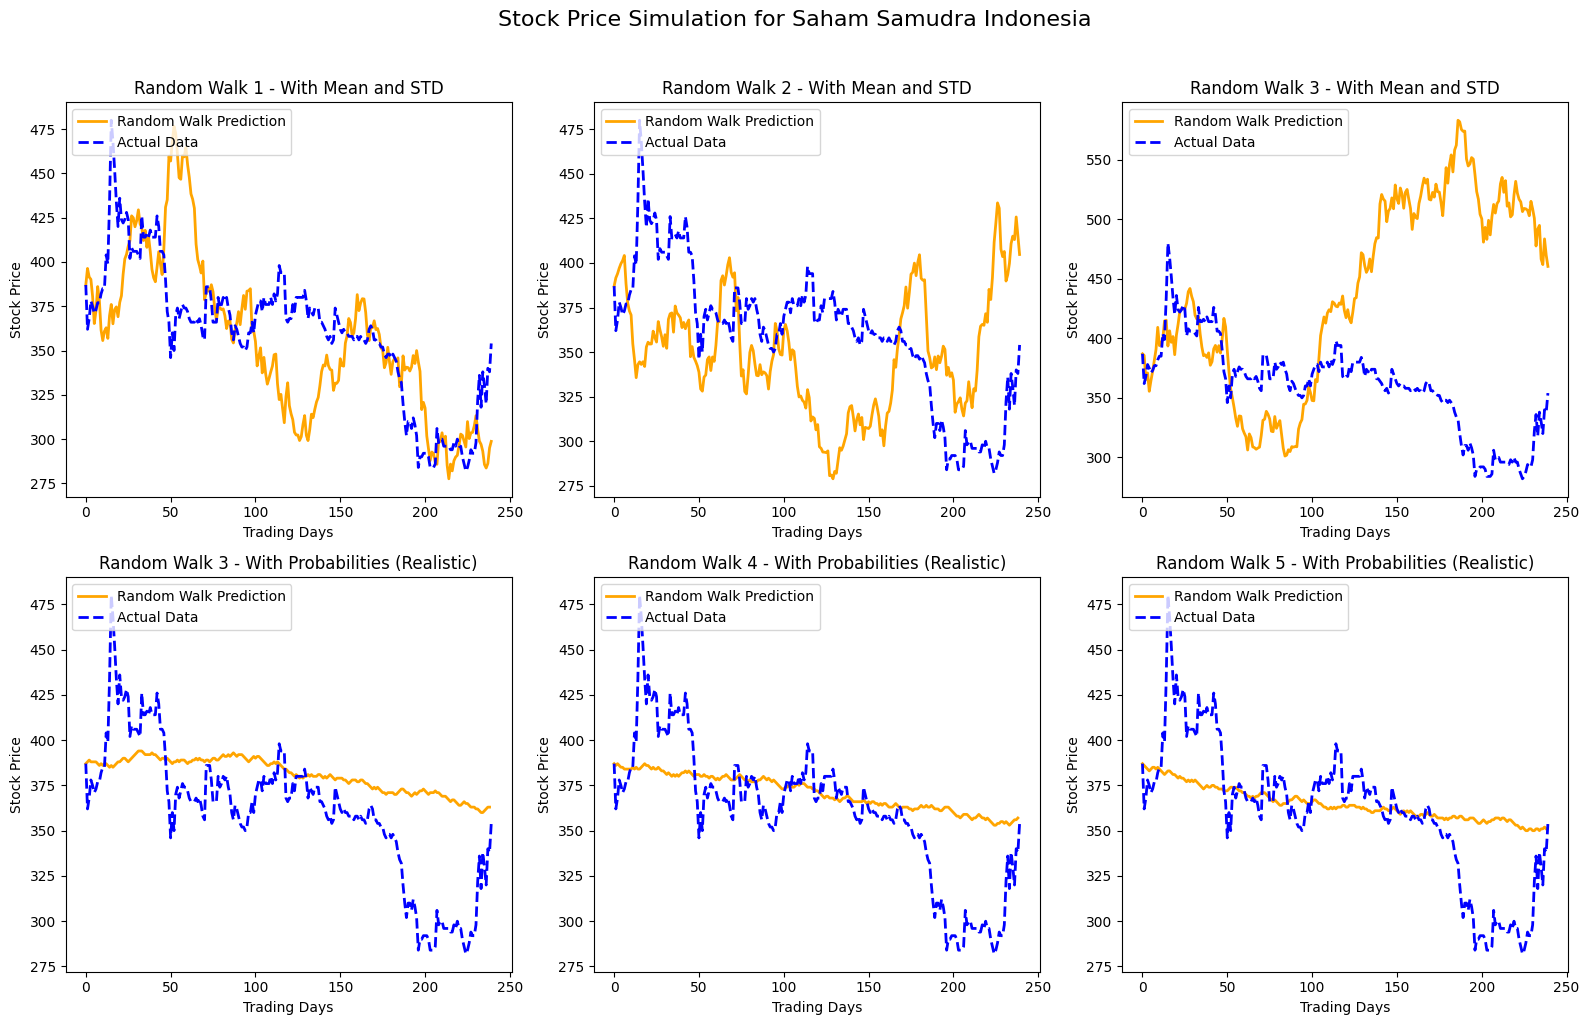

In [6]:
# Calculate daily returns
numpy_array = SMDR['Close'].to_numpy()
daily_returns = calculate_daily_returns(numpy_array)

# Calculate mean and standard deviation of daily returns
mean, std = calculate_statistics(daily_returns)

# Parameters for random walk simulations
num_days = len(SMDR)  # Number of trading days in a year
initial_stock_price = SMDR['Close'].iloc[0]  # Initial stock price
probabilities = [0.4, 0.3, 0.3]  # Probabilities for up, down, and no movement

# Visualize Random Walk
fig, axs = plt.subplots(2, 3, figsize=(16, 10))
axs = axs.flatten()

# Plot actual data and random walk predictions
for i in range(6):
    if i < 3:
        SMDR_stock_prices = stock_price_random_walk(num_days, initial_stock_price, mean, std)
        axs[i].plot(SMDR_stock_prices, color='orange', label='Random Walk Prediction', linewidth=2)
        axs[i].plot(SMDR['Close'], color='blue', label='Actual Data', linewidth=2, linestyle='--')
        axs[i].set_title(f'Random Walk {i+1} - With Mean and STD')
    else:
        prices_with_probabilities = realistic_random_walk_with_probabilities(initial_stock_price, num_days, probabilities)
        axs[i].plot(prices_with_probabilities, color='orange', label='Random Walk Prediction', linewidth=2)
        axs[i].plot(SMDR['Close'], color='blue', label='Actual Data', linewidth=2, linestyle='--')
        axs[i].set_title(f'Random Walk {i} - With Probabilities (Realistic)')

    axs[i].set_xlabel('Trading Days')
    axs[i].set_ylabel('Stock Price')
    axs[i].legend(loc='upper left')

fig.suptitle('Stock Price Simulation for Saham Samudra Indonesia', fontsize=16, y=1.02)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [7]:
PGEO = pd.read_csv("PGEO.JK.csv")
PGEO

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-24,925.0,925.0,815.0,875.0,863.872925,584706700
1,2023-02-27,875.0,875.0,830.0,830.0,819.445190,90183300
2,2023-02-28,815.0,840.0,800.0,800.0,789.826660,65393800
3,2023-03-01,800.0,840.0,800.0,835.0,824.381592,43259400
4,2023-03-02,840.0,875.0,820.0,870.0,858.936523,55298000
...,...,...,...,...,...,...,...
199,2023-12-28,1215.0,1215.0,1180.0,1185.0,1185.000000,29330300
200,2023-12-29,1185.0,1195.0,1160.0,1170.0,1170.000000,26568800
201,2024-01-02,1170.0,1265.0,1170.0,1265.0,1265.000000,95095400
202,2024-01-03,1265.0,1300.0,1255.0,1280.0,1280.000000,93216000


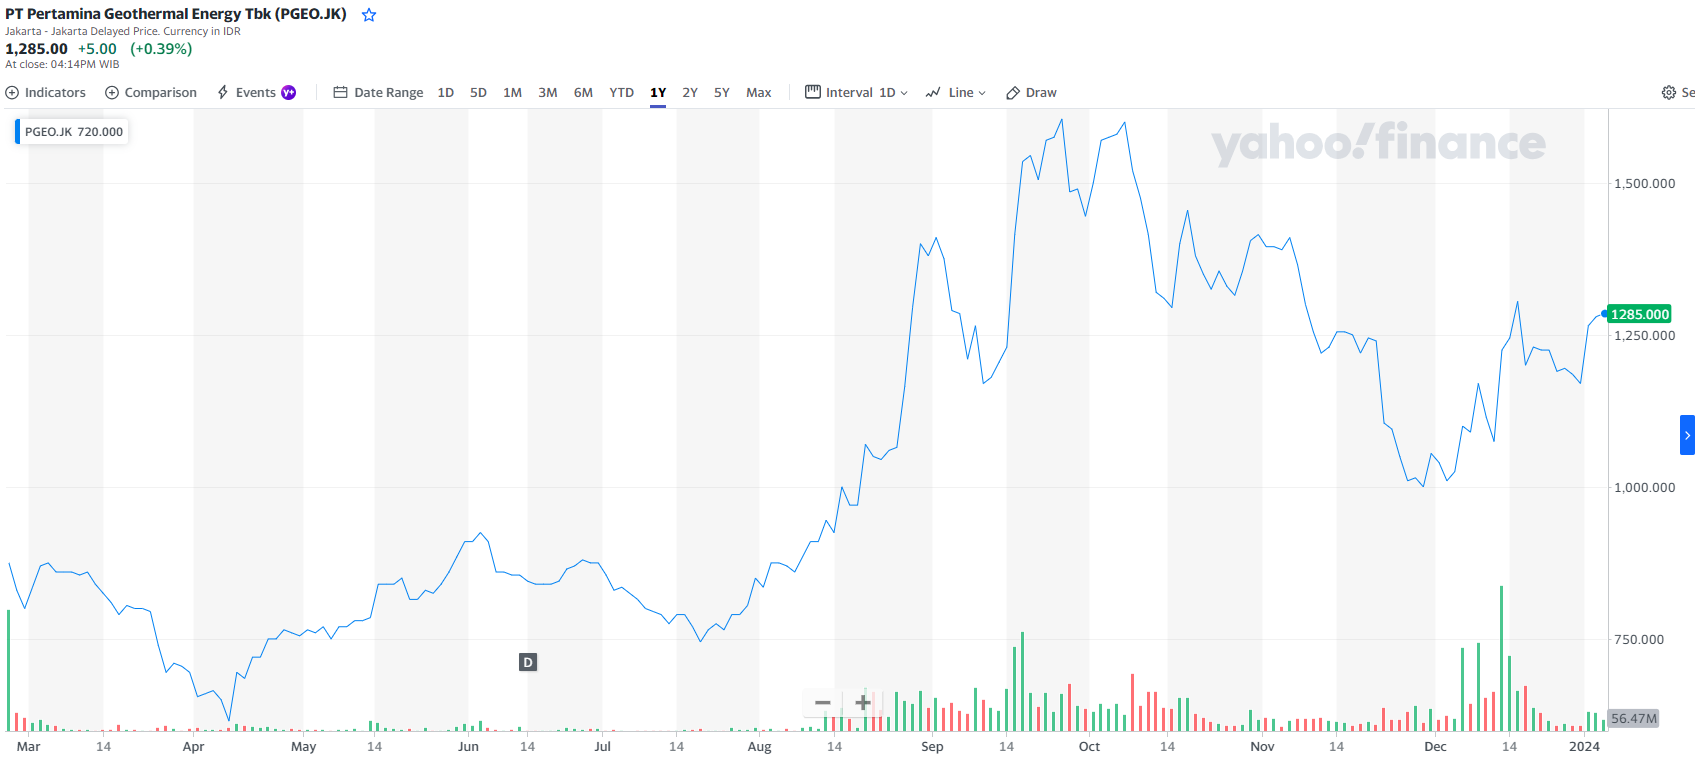

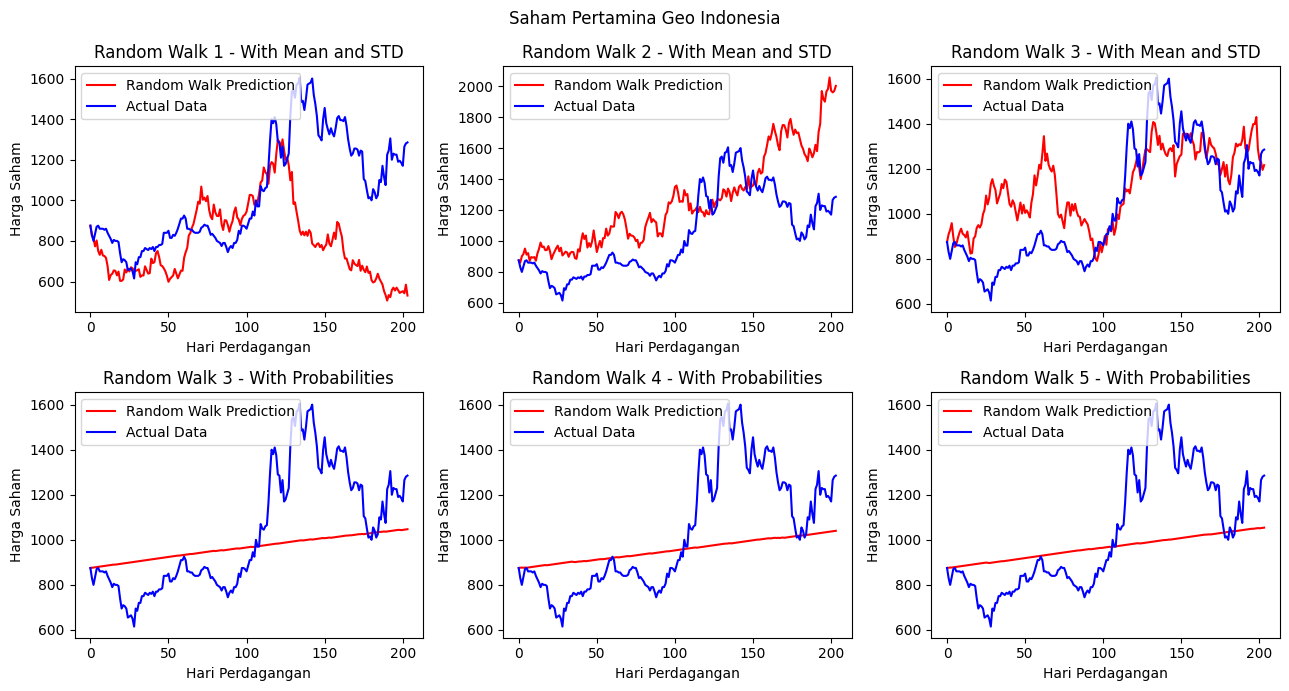

In [8]:
# Menghitung perubahan harian
numpy_array_PGEO = PGEO['Close'].to_numpy()
daily_returns_PGEO = calculate_daily_returns(numpy_array_PGEO)

# Menghitung mean dan standard deviation dari perubahan harian
mean_PGEO, std_PGEO = calculate_statistics(daily_returns_PGEO)

# Parameter untuk simulasi random walk saham
num_days_PGEO = len(PGEO)  # Jumlah hari perdagangan dalam satu tahun kerja
initial_stock_price_PGEO = PGEO['Close'][0]  # Harga saham awal
probabilities_PGEO = [0.05, 0.05, 0.9]  # Probabilitas untuk langkah naik, turun, dan tetap

# Visualisasi Random Walk
fig, axs = plt.subplots(2, 3, figsize=(13, 7))
axs = axs.flatten()

for i in range(6):
  if (i < 3):
    PGEO_stock_prices = stock_price_random_walk(num_days_PGEO, initial_stock_price_PGEO, mean_PGEO, std_PGEO)
    axs[i].plot(PGEO_stock_prices, color='red', label='Random Walk Prediction')
    axs[i].plot(PGEO['Close'], color='blue', label='Actual Data')
    axs[i].set_title(f'Random Walk {i+1} - With Mean and STD')
    axs[i].set_xlabel('Hari Perdagangan')
    axs[i].set_ylabel('Harga Saham')
    axs[i].legend(loc='upper left')
  else:
    prices_with_probabilities_PGEO = random_walk_with_probabilities(initial_stock_price_PGEO, num_days_PGEO, probabilities_PGEO)
    axs[i].plot(prices_with_probabilities_PGEO, color='red', label='Random Walk Prediction')
    axs[i].plot(PGEO['Close'], color='blue', label='Actual Data')
    axs[i].set_title(f'Random Walk {i} - With Probabilities')
    axs[i].set_xlabel('Hari Perdagangan')
    axs[i].set_ylabel('Harga Saham')
    axs[i].legend(loc='upper left')

fig.suptitle('Saham Pertamina Geo Indonesia')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

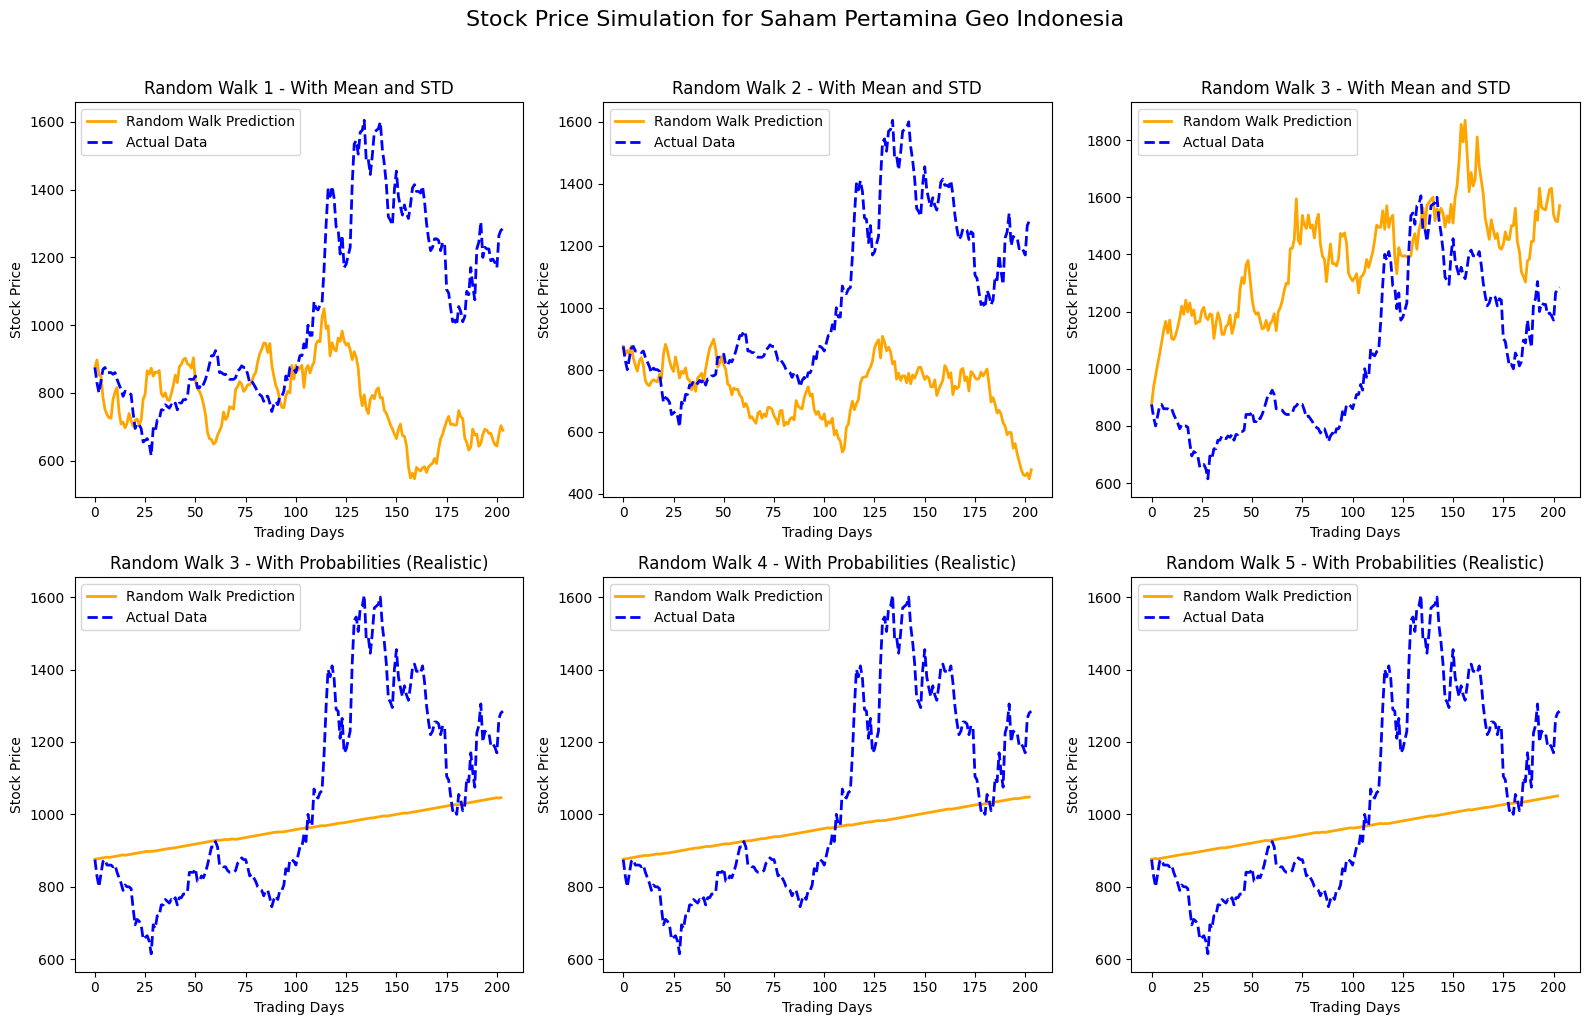

In [9]:
# Calculate daily returns
numpy_array_PGEO = PGEO['Close'].to_numpy()
daily_returns_PGEO = calculate_daily_returns(numpy_array_PGEO)

# Menghitung mean dan standard deviation dari perubahan harian
mean_PGEO, std_PGEO = calculate_statistics(daily_returns_PGEO)

# Parameter untuk simulasi random walk saham
num_days_PGEO = len(PGEO)  # Jumlah hari perdagangan dalam satu tahun kerja
initial_stock_price_PGEO = PGEO['Close'].iloc[0]  # Harga saham awal
probabilities_PGEO = [0.05, 0.05, 0.9]  # Probabilitas untuk langkah naik, turun, dan tetap

# Visualisasi Random Walk
fig, axs = plt.subplots(2, 3, figsize=(16, 10))
axs = axs.flatten()

# Plot actual data and random walk predictions
for i in range(6):
    if i < 3:
        PGEO_stock_prices = stock_price_random_walk(num_days_PGEO, initial_stock_price_PGEO, mean_PGEO, std_PGEO)
        axs[i].plot(PGEO_stock_prices, color='orange', label='Random Walk Prediction', linewidth=2)
        axs[i].plot(PGEO['Close'], color='blue', label='Actual Data', linewidth=2, linestyle='--')
        axs[i].set_title(f'Random Walk {i+1} - With Mean and STD')
    else:
        prices_with_probabilities_PGEO = realistic_random_walk_with_probabilities(initial_stock_price_PGEO, num_days_PGEO, probabilities_PGEO)
        axs[i].plot(prices_with_probabilities_PGEO, color='orange', label='Random Walk Prediction', linewidth=2)
        axs[i].plot(PGEO['Close'], color='blue', label='Actual Data', linewidth=2, linestyle='--')
        axs[i].set_title(f'Random Walk {i} - With Probabilities (Realistic)')

    axs[i].set_xlabel('Trading Days')
    axs[i].set_ylabel('Stock Price')
    axs[i].legend(loc='upper left')

fig.suptitle('Stock Price Simulation for Saham Pertamina Geo Indonesia', fontsize=16, y=1.02)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()